### ----    DATA SOURCE  ---- ####

https://archive.ics.uci.edu/ml/datasets/Heart+failure+clinical+records


- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- [target] death event: if the patient deceased during the follow-up period (boolean)


What do we calculate?

$$ Log Odds( y=1 )=  \beta_0+ \beta_{1}*x_{1} + \beta_{2}*x_{2} + \beta_{3}*x_{3} $$

Odds

$$ Odds( y=1 )= e^{ \beta_0+ \beta_{1}*x_{1} + \beta_{2}*_{2} + \beta_{3}*_{3} } =  e^{ \beta_0}  e^{\beta_{1}*x_{1}} e^{ \beta_{2}*x_{2}} e^{\beta_{3}*x_{3} }$$

we know

$$ Odds = {p \over {1 - p}} $$

Probability of y given x:

$$  P(y=1|X)  = {1\over {1 + e^{- (\beta_0 + \beta_{1}*x_{1} + \beta_{2}*x_{2}
                       + \beta_{3}*x_{3} )}}  }  $$
                       
In summary, we calculate the LogOdds and then the probability which we transform to 0 or 1 using a threshold, typically 0.5.


In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score
from sklearn.metrics import confusion_matrix

In [2]:
heart_failure = pd.read_csv('C:/Users/isach/Documents/Canal Yout/Practica R/heart_failure_clinical_records_dataset.csv')

In [3]:
heart_failure.head(n=10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


In [4]:
cols =["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine","serum_sodium","time"];
heart_failure[cols].corr()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
age,1.000000,-0.081584,0.060098,-0.052354,0.159187,-0.045966,-0.224068
creatinine_phosphokinase,-0.081584,1.000000,-0.044080,0.024463,-0.016408,0.059550,-0.009346
ejection_fraction,0.060098,-0.044080,1.000000,0.072177,-0.011302,0.175902,0.041729
platelets,-0.052354,0.024463,0.072177,1.000000,-0.041198,0.062125,0.010514
serum_creatinine,0.159187,-0.016408,-0.011302,-0.041198,1.000000,-0.189095,-0.149315
serum_sodium,-0.045966,0.059550,0.175902,0.062125,-0.189095,1.000000,0.087640
time,-0.224068,-0.009346,0.041729,0.010514,-0.149315,0.087640,1.000000


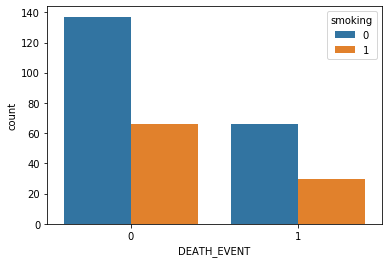

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.countplot(x="DEATH_EVENT", hue="smoking", data=heart_failure);

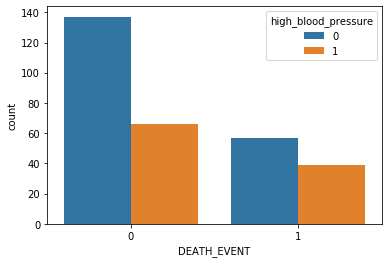

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.countplot(x="DEATH_EVENT", hue="high_blood_pressure", data=heart_failure);

In [10]:
heart_failure.groupby(['DEATH_EVENT'])['age'].mean()

DEATH_EVENT
0    58.761906
1    65.215281
Name: age, dtype: float64

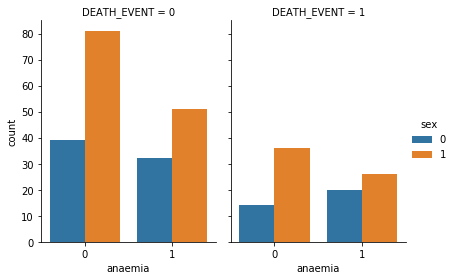

In [11]:
sns.catplot(x="anaemia", hue="sex", col="DEATH_EVENT",
                data=heart_failure, kind="count",
                height=4, aspect=.7);

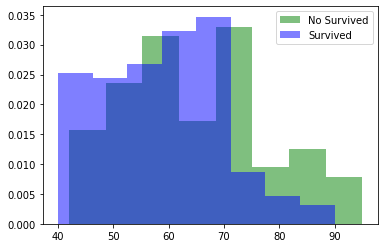

In [13]:
x1 = heart_failure.age[heart_failure.DEATH_EVENT==1]
x2 = heart_failure[heart_failure.DEATH_EVENT==0]['age']

# Normalize
kwargs = dict(alpha=0.5, bins=8, density=True, stacked=True)  # 8 bins for 8 groups of age, 0 -10 , 11 - 20, ...

plt.hist(x1, **kwargs, color='g', label='No Survived');      # green
plt.hist(x2, **kwargs, color='b', label='Survived');   # blue
plt.legend();

### Split data in train and test

In [14]:
from sklearn.model_selection import train_test_split
X= heart_failure.drop(columns = "DEATH_EVENT")
y= heart_failure.DEATH_EVENT

X_train, X_test, y_train, y_test = train_test_split(X,y , random_state = 0,test_size=0.30)

### Running model

In [15]:
model = LogisticRegression(solver='lbfgs',max_iter=10000) #, C= 1e9

model.fit(X_train, y_train)

predictions = model.predict(X_test)    ## predictions are binary classes (0 or 1)

accuracyTrain = model.score(X_train, y_train)
accuracyTest = model.score(X_test, y_test)

print("Accuracy in Training set: ", accuracyTrain)
print("Accuracy in Testing set: ", accuracyTest)

from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_train, y_train, cv=5).mean()

print("Accuracy in cross validation: ", scores)

Accuracy in Training set:  0.84688995215311
Accuracy in Testing set:  0.7888888888888889
Accuracy in cross validation:  0.847327337060746


In [16]:
model.coef_

array([[ 6.36015619e-02,  3.87211426e-04,  3.10861114e-04,
         7.28595893e-04, -8.22867204e-02, -6.62807691e-04,
        -8.02974398e-07,  5.61601636e-03,  3.37448809e-03,
        -1.03793998e-03, -2.88522163e-04, -1.94376519e-02]])

## Using StatsModels library

In [17]:
import statsmodels.api as sm

X_m = sm.add_constant(X_train)

# Output from statsmodels
logit = sm.Logit(y_train, X_m)
results = logit.fit()   #.params

results.summary()

C:\Users\isach\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Optimization terminated successfully.
         Current function value: 0.351414
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            DEATH_EVENT   No. Observations:                  209
Model:                          Logit   Df Residuals:                      196
Method:                           MLE   Df Model:                           12
Date:                Tue, 07 Jul 2020   Pseudo R-squ.:                  0.4429
Time:                        16:44:18   Log-Likelihood:                -73.445
converged:                       True   LL-Null:                       -131.85
Covariance Type:            nonrobust   LLR p-value:                 2.679e-19
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       11.4142      6.722      1.698      0.089      -1.760      24.588
age                          0.0663      0.021      3.143      0.002       0.025       0.108
anaemia                      0.0687      0.434      0.158      0.874      -0.781       0.918
creatinine_phosphokinase     0.0004      0.000      1.563      0.118      -0.000       0.001
diabetes                     0.2499      0.436      0.573      0.567      -0.605       1.105
ejection_fraction           -0.0883      0.022     -3.980      0.000      -0.132      -0.045
high_blood_pressure         -0.3556      0.454     -0.783      0.433      -1.245       0.534
platelets                -1.213e-06   2.23e-06     -0.543      0.587   -5.59e-06    3.17e-06
serum_creatinine             0.4064      0.265      1.535      0.125      -0.113       0.925
serum_sodium                -0.0792      0.047     -1.702      0.089      -0.170       0.012
sex                         -1.0197      0.508     -2.009      0.045      -2.015      -0.025
smoking                      0.2383      0.529      0.450      0.653      -0.799       1.276
time                        -0.0206      0.004     -5.554      0.000      -0.028      -0.013
============================================================================================
"""

In [18]:
## not including anaemia, platelets,smoking
cols = ["anaemia", "platelets","smoking"]

X_m = X_m.drop(columns =cols)

#cols = ["age","creatinine_phosphokinase","diabetes","ejection_fraction","high_blood_pressure","serum_creatinine","serum_sodium",
#       "sex","time"]

logit2 = sm.Logit(y_train, X_m)
results2 = logit2.fit()   #.params

results2.summary()

Optimization terminated successfully.
         Current function value: 0.352582
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            DEATH_EVENT   No. Observations:                  209
Model:                          Logit   Df Residuals:                      199
Method:                           MLE   Df Model:                            9
Date:                Tue, 07 Jul 2020   Pseudo R-squ.:                  0.4411
Time:                        16:48:50   Log-Likelihood:                -73.690
converged:                       True   LL-Null:                       -131.85
Covariance Type:            nonrobust   LLR p-value:                 7.583e-21
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       11.2351      6.654      1.689      0.091      -1.806      24.276
age                          0.0661      0.021      3.163      0.002       0.025       0.107
creatinine_phosphokinase     0.0004      0.000      1.480      0.139      -0.000       0.001
diabetes                     0.2481      0.435      0.570      0.568      -0.604       1.101
ejection_fraction           -0.0890      0.022     -4.038      0.000      -0.132      -0.046
high_blood_pressure         -0.3742      0.452     -0.828      0.408      -1.260       0.512
serum_creatinine             0.3891      0.261      1.491      0.136      -0.122       0.901
serum_sodium                -0.0794      0.046     -1.725      0.085      -0.170       0.011
sex                         -0.9028      0.451     -2.001      0.045      -1.787      -0.019
time                        -0.0206      0.004     -5.606      0.000      -0.028      -0.013
============================================================================================
"""

In [19]:
cols = ["diabetes", "high_blood_pressure"]

X_m = X_m.drop(columns =cols)

logit3 = sm.Logit(y_train, X_m)
results3 = logit3.fit()   #.params

results3.summary()

Optimization terminated successfully.
         Current function value: 0.355168
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            DEATH_EVENT   No. Observations:                  209
Model:                          Logit   Df Residuals:                      201
Method:                           MLE   Df Model:                            7
Date:                Tue, 07 Jul 2020   Pseudo R-squ.:                  0.4370
Time:                        16:49:39   Log-Likelihood:                -74.230
converged:                       True   LL-Null:                       -131.85
Covariance Type:            nonrobust   LLR p-value:                 7.522e-22
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       11.2482      6.334      1.776      0.076      -1.166      23.662
age                          0.0641      0.020      3.138      0.002       0.024       0.104
creatinine_phosphokinase     0.0004      0.000      1.508      0.132      -0.000       0.001
ejection_fraction           -0.0877      0.022     -3.998      0.000      -0.131      -0.045
serum_creatinine             0.4273      0.255      1.675      0.094      -0.073       0.927
serum_sodium                -0.0802      0.045     -1.791      0.073      -0.168       0.008
sex                         -0.8620      0.440     -1.961      0.050      -1.724      -0.000
time                        -0.0200      0.004     -5.600      0.000      -0.027      -0.013
============================================================================================
"""

In [20]:
cols = ["serum_sodium", "creatinine_phosphokinase"]

X_m = X_m.drop(columns =cols)

logit4 = sm.Logit(y_train, X_m)
results4 = logit4.fit()   #.params

results4.summary()

Optimization terminated successfully.
         Current function value: 0.370550
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            DEATH_EVENT   No. Observations:                  209
Model:                          Logit   Df Residuals:                      203
Method:                           MLE   Df Model:                            5
Date:                Tue, 07 Jul 2020   Pseudo R-squ.:                  0.4126
Time:                        16:50:24   Log-Likelihood:                -77.445
converged:                       True   LL-Null:                       -131.85
Covariance Type:            nonrobust   LLR p-value:                 7.337e-22
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7060      1.289      0.548      0.584      -1.821       3.233
age                   0.0567      0.019      2.985      0.003       0.019       0.094
ejection_fraction    -0.0855      0.021     -4.083      0.000      -0.126      -0.044
serum_creatinine      0.4960      0.248      2.000      0.045       0.010       0.982
sex                  -0.6705      0.422     -1.588      0.112      -1.498       0.157
time                 -0.0196      0.003     -5.659      0.000      -0.026      -0.013
=====================================================================================
"""

In [21]:
cols = ["sex"]

X_m = X_m.drop(columns =cols)

logit5 = sm.Logit(y_train, X_m)
results5 = logit5.fit()   #.params

results5.summary()

Optimization terminated successfully.
         Current function value: 0.376670
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            DEATH_EVENT   No. Observations:                  209
Model:                          Logit   Df Residuals:                      204
Method:                           MLE   Df Model:                            4
Date:                Tue, 07 Jul 2020   Pseudo R-squ.:                  0.4029
Time:                        16:51:06   Log-Likelihood:                -78.724
converged:                       True   LL-Null:                       -131.85
Covariance Type:            nonrobust   LLR p-value:                 4.600e-22
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.4485      1.260      0.356      0.722      -2.020       2.917
age                   0.0525      0.019      2.836      0.005       0.016       0.089
ejection_fraction    -0.0821      0.021     -4.002      0.000      -0.122      -0.042
serum_creatinine      0.4871      0.253      1.928      0.054      -0.008       0.982
time                 -0.0197      0.003     -5.701      0.000      -0.026      -0.013
=====================================================================================
"""

What do we calculate?

$$ Log Odds( y=1 )=  \beta_0+ \beta_{ejection}*x_{ejection} + \beta_{serum}*x_{serum} + \beta_{time}*x_{time} $$

Odds

$$ Odds( y=1 )= e^{ \beta_0+ \beta_{ejection}*x_{ejection} + \beta_{serum}*_{serum} + \beta_{time}*_{time} } = 
               e^{ \beta_0}  e^{\beta_{ejection}*x_{ejection}} e^{ \beta_{serum}*x_{serum}} e^{\beta_{time}*x_{time} }$$

we know

$$ Odds = {p \over {1 - p}} $$

Probability of y given x:

$$  P(y=1|X)  = {1\over {1 + e^{- (\beta_0 + \beta_{ejection}*x_{ejection} + \beta_{serum}*x_{serum}
                       + \beta_{time}*x_{time} )}}  }  $$
                       
In summary, we calculate the LogOdds and then the probability which we transform to 0 or 1 using a threshold, typically 0.5.


## Performance of the model

In [30]:
colu = ['age', 'ejection_fraction', 'serum_creatinine', 'time'] # columns we need

X_test_m = sm.add_constant(X_test[colu])  ## necessary

pred_train = results5.predict(X_m)    ## results are probabilities

pred_train =  pred_train.apply(lambda x: 1 if x >0.5 else 0)

pred_test = results5.predict(X_test_m)

pred_test =  pred_test.apply(lambda x: 1 if x >0.5 else 0)

##  score function not available in statsmodels

from sklearn.metrics import accuracy_score

accuracyTrain = accuracy_score(y_train, pred_train )
accuracyTest = accuracy_score(y_test, pred_test)

print("Accuracy in Training set: ", accuracyTrain)

print("Accuracy in Testing set: ", accuracyTest)

Accuracy in Training set:  0.8373205741626795
Accuracy in Testing set:  0.8222222222222222


#### Question: Different than model used with sklearn.linear_model  ??

In [35]:
model.fit(X_train[colu], y_train).score(X_test[colu], y_test)

0.8222222222222222

### Other way to run logistic model??

In [36]:
X_m.columns

Index(['const', 'age', 'ejection_fraction', 'serum_creatinine', 'time'], dtype='object')

In [37]:
logit_glm = sm.GLM(y_train, X_m, family=sm.families.Binomial()).fit()
logit_glm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            DEATH_EVENT   No. Observations:                  209
Model:                            GLM   Df Residuals:                      204
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -78.724
Date:                Tue, 30 Jun 2020   Deviance:                       157.45
Time:                        23:17:39   Pearson chi2:                     212.
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.4485      1.260      0.356      0.722      -2.020       2.917
age                   0.0525      0.019      2.836      0.005       0.016       0.089
ejection_fraction    -0.0821      0.021     -4.002      0.000      -0.122      -0.042
serum_creatinine      0.4871      0.253      1.928      0.054      -0.008       0.982
time                 -0.0197      0.003     -5.701      0.000      -0.026      -0.013
=====================================================================================
"""